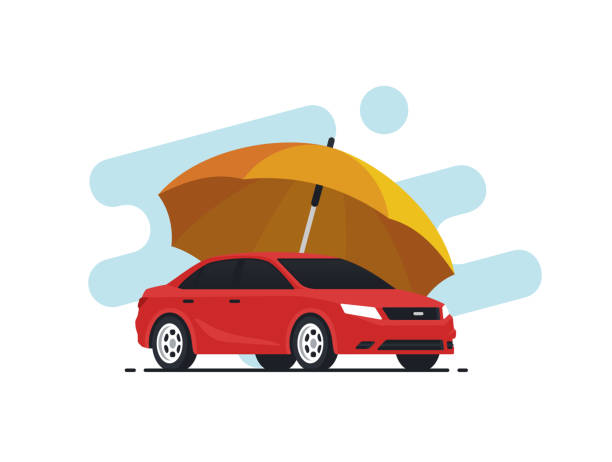
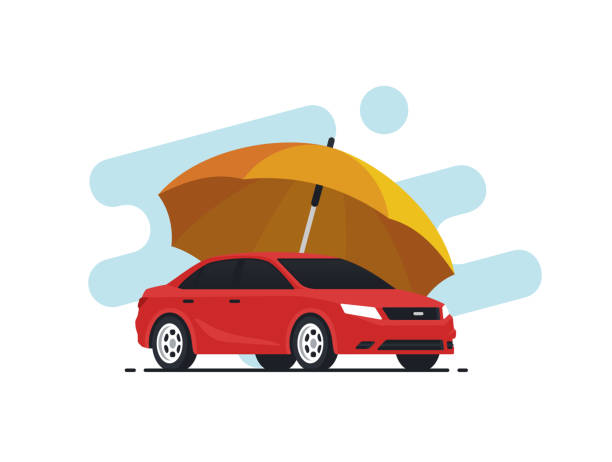

In [3]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("./carclaims.csv")

In [5]:
df.tail()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,Yes
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,No
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,No
15419,Dec,2,Wednesday,Toyota,Urban,Thursday,Dec,3,Male,Single,...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes


In [6]:
print(df.columns)

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound'],
      dtype='object')


In [7]:
print(df[['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea']])

      Month  WeekOfMonth  DayOfWeek     Make AccidentArea
0       Dec            5  Wednesday    Honda        Urban
1       Jan            3  Wednesday    Honda        Urban
2       Oct            5     Friday    Honda        Urban
3       Jun            2   Saturday   Toyota        Rural
4       Jan            5     Monday    Honda        Urban
...     ...          ...        ...      ...          ...
15415   Nov            4     Friday   Toyota        Urban
15416   Nov            5   Thursday  Pontiac        Urban
15417   Nov            5   Thursday   Toyota        Rural
15418   Dec            1     Monday   Toyota        Urban
15419   Dec            2  Wednesday   Toyota        Urban

[15420 rows x 5 columns]


In [8]:
print(df[['DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', ]])

      DayOfWeekClaimed MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  \
0              Tuesday          Jan                   1  Female        Single   
1               Monday          Jan                   4    Male        Single   
2             Thursday          Nov                   2    Male       Married   
3               Friday          Jul                   1    Male       Married   
4              Tuesday          Feb                   2  Female        Single   
...                ...          ...                 ...     ...           ...   
15415          Tuesday          Nov                   5    Male       Married   
15416           Friday          Dec                   1    Male       Married   
15417           Friday          Dec                   1    Male        Single   
15418         Thursday          Dec                   2  Female       Married   
15419         Thursday          Dec                   3    Male        Single   

       Age          Fault  

In [9]:
print(df[['PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims']])

       PolicyNumber  RepNumber  Deductible  DriverRating Days:Policy-Accident  \
0                 1         12         300             1         more than 30   
1                 2         15         400             4         more than 30   
2                 3          7         400             3         more than 30   
3                 4          4         400             2         more than 30   
4                 5          3         400             1         more than 30   
...             ...        ...         ...           ...                  ...   
15415         15416          5         400             4         more than 30   
15416         15417         11         400             3         more than 30   
15417         15418          4         400             4         more than 30   
15418         15419          6         400             4         more than 30   
15419         15420          3         400             4         more than 30   

      Days:Policy-Claim Pas

In [10]:
print("Number of Features Available:",df.shape[1])
print("Number of Records Available :",df.shape[0])

Number of Features Available: 33
Number of Records Available : 15420


In [11]:
print("Any missing data?:")
print(df.isnull().sum())

Any missing data?:
Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64


# Визуализация данных

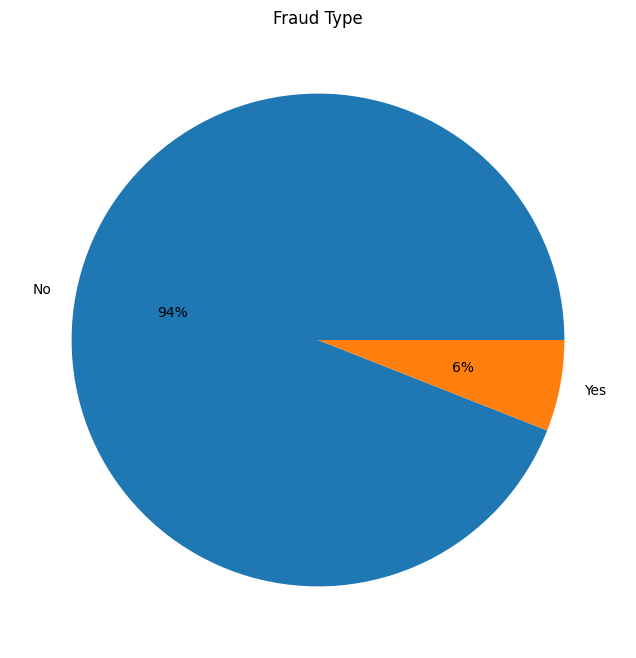

In [12]:
plt.figure(figsize=(10,8))
plt.pie(df.FraudFound.value_counts().values,labels=df.FraudFound.value_counts().index,  autopct='%.0f%%')
plt.title("Fraud Type")
plt.show()

### Только 6% претензий определены как мошеннические. Это говорит о том, что датасет сильно несбалансирован.

In [13]:
df.loc[df['FraudFound'] == 'No','FraudFound'] = 0
df.loc[df['FraudFound'] == 'Yes','FraudFound'] = 1

df['FraudFound'] = df['FraudFound'].astype(int)

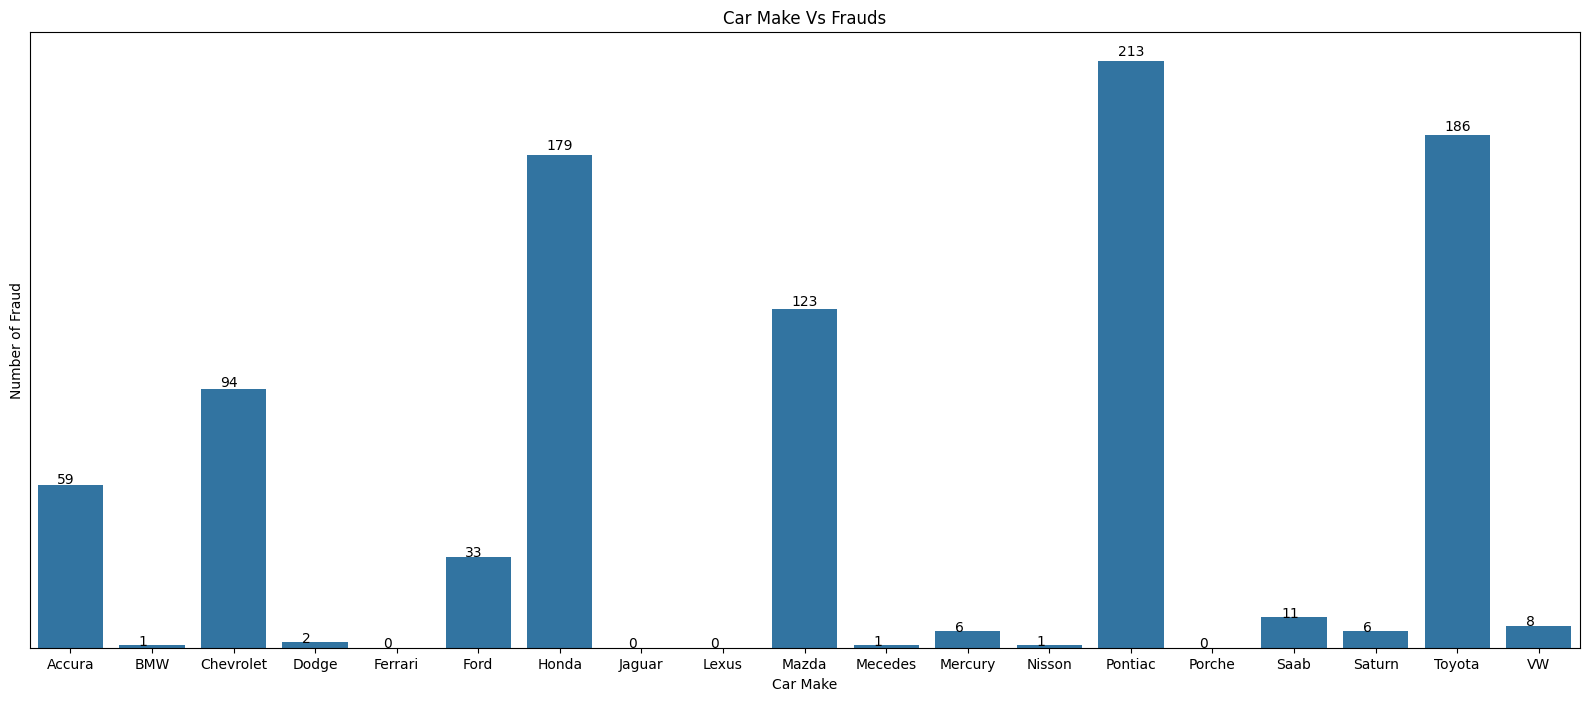

In [14]:
make = df.groupby('Make')['FraudFound'].sum()
plt.figure(figsize=(20,8))
plt.title("Car Make Vs Frauds")

ax = sns.barplot(x=make.index,y=make.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Car Make")
plt.ylabel("Number of Fraud");
plt.yticks([])
plt.show()

### Большинство случаев мошенничества выявлены с автомобилями компании Pontiac, а с автомобилями компании Jaguar, Lexus, Porsche и Ferrari таких случаев не обнаружено.

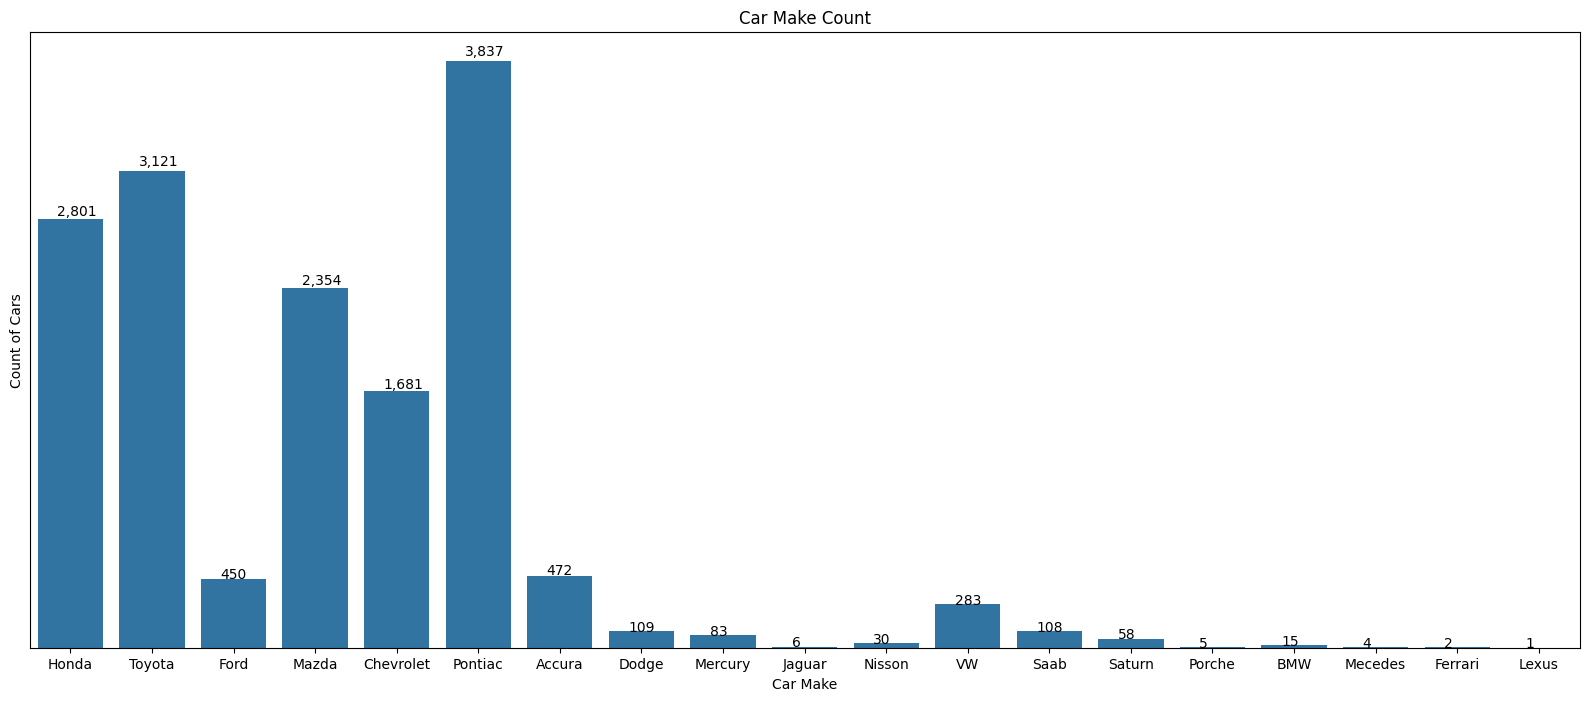

In [15]:
plt.figure(figsize=(20,8))
plt.title("Car Make Count")

ax = sns.countplot(x=df['Make'])
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Car Make")
plt.ylabel("Count of Cars");
plt.yticks([])
plt.show()

### Число автомобилей, участвовавших в авариях, объясняет, почему у марок Jaguar, Lexus, Porsche и Ferrari отсутствуют претензии о мошенничестве, в то время как у Pontiac таких претензий много.

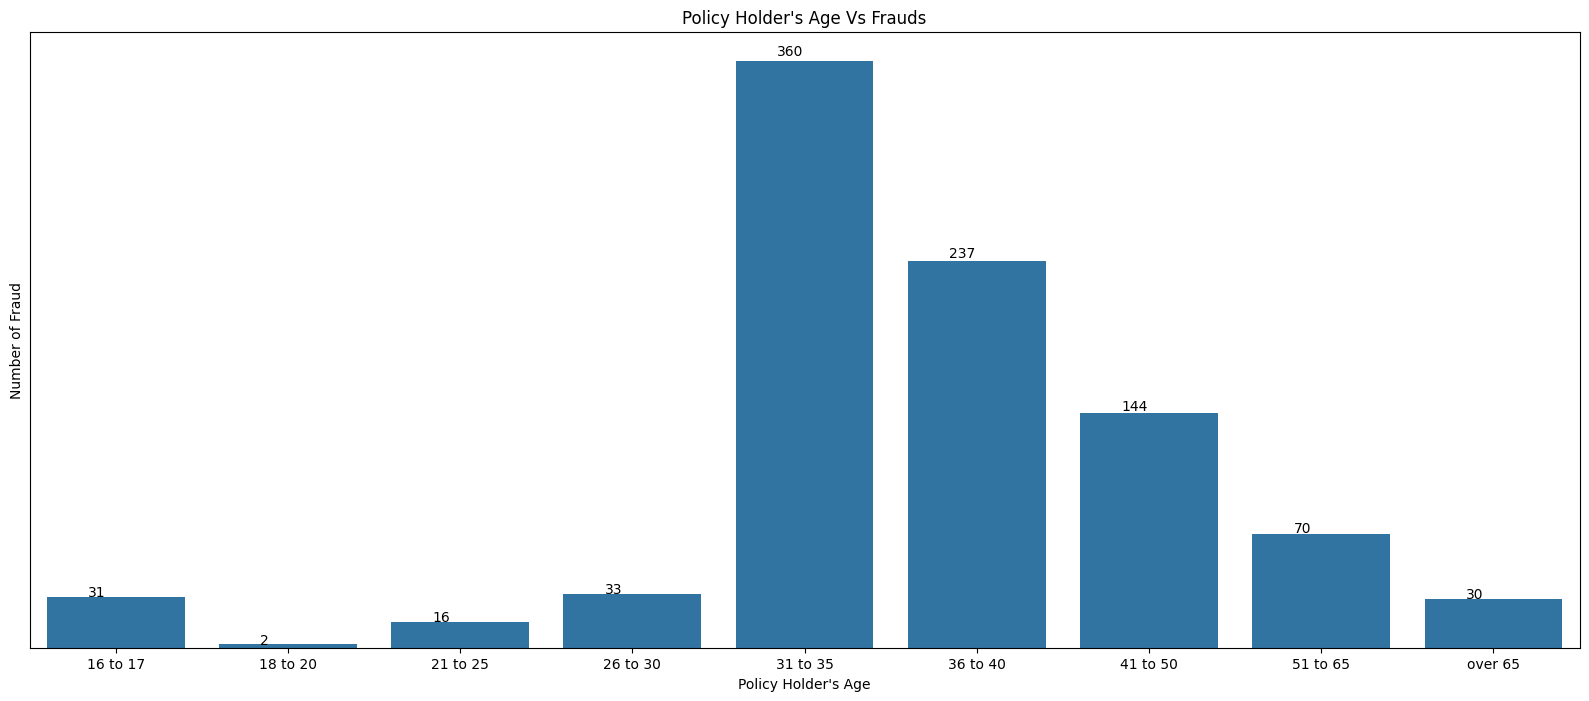

In [16]:
policyAge = df.groupby('AgeOfPolicyHolder')['FraudFound'].sum()
plt.figure(figsize=(20,8))
plt.title("Policy Holder's Age Vs Frauds")

ax = sns.barplot(x=policyAge.index,y=policyAge.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Policy Holder's Age")
plt.ylabel("Number of Fraud");
plt.yticks([])
plt.show()

### Большинство случаев мошенничества наблюдается в возрастной группе 31-35 лет, в то время как наименьшее количество случаев приходится на возрастную группу 18-20 лет.

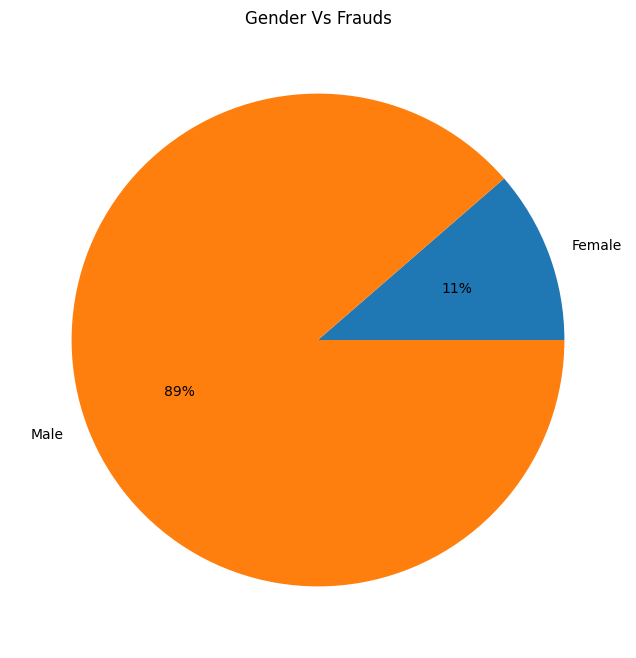

In [17]:
gender = df.groupby('Sex')['FraudFound'].sum()
plt.figure(figsize=(10,8))
plt.title("Gender Vs Frauds")

plt.pie(gender.values,labels=gender.index,  autopct='%.0f%%')

plt.show()

### Среди мужчин мошенничество встречается чаще, чем среди женщин.

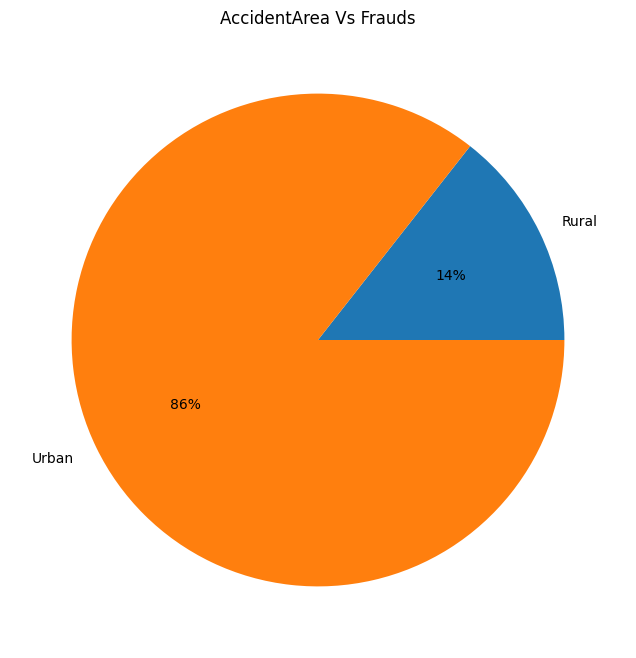

In [18]:
accidentArea = df.groupby('AccidentArea')['FraudFound'].sum()

plt.figure(figsize=(10,8))
plt.title("AccidentArea Vs Frauds")

plt.pie(accidentArea.values,labels=accidentArea.index,  autopct='%.0f%%')

plt.show()

### Случаи мошенничества чаще наблюдаются в городских районах, чем в сельских.

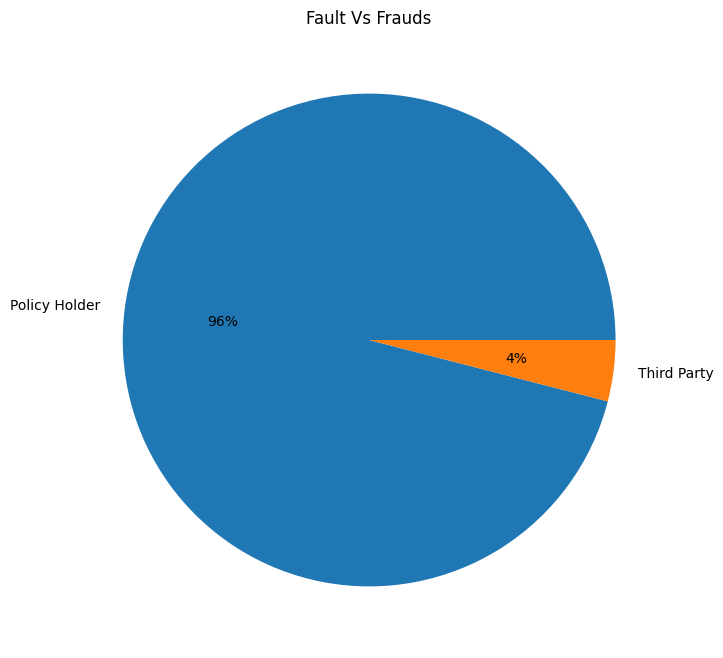

In [19]:
fault = df.groupby('Fault')['FraudFound'].sum()

plt.figure(figsize=(10,8))
plt.title("Fault Vs Frauds")
plt.pie(fault.values,labels=fault.index,  autopct='%.0f%%')
plt.show()

### Очевидно, что мошенничество чаще совершают держатели полисов.

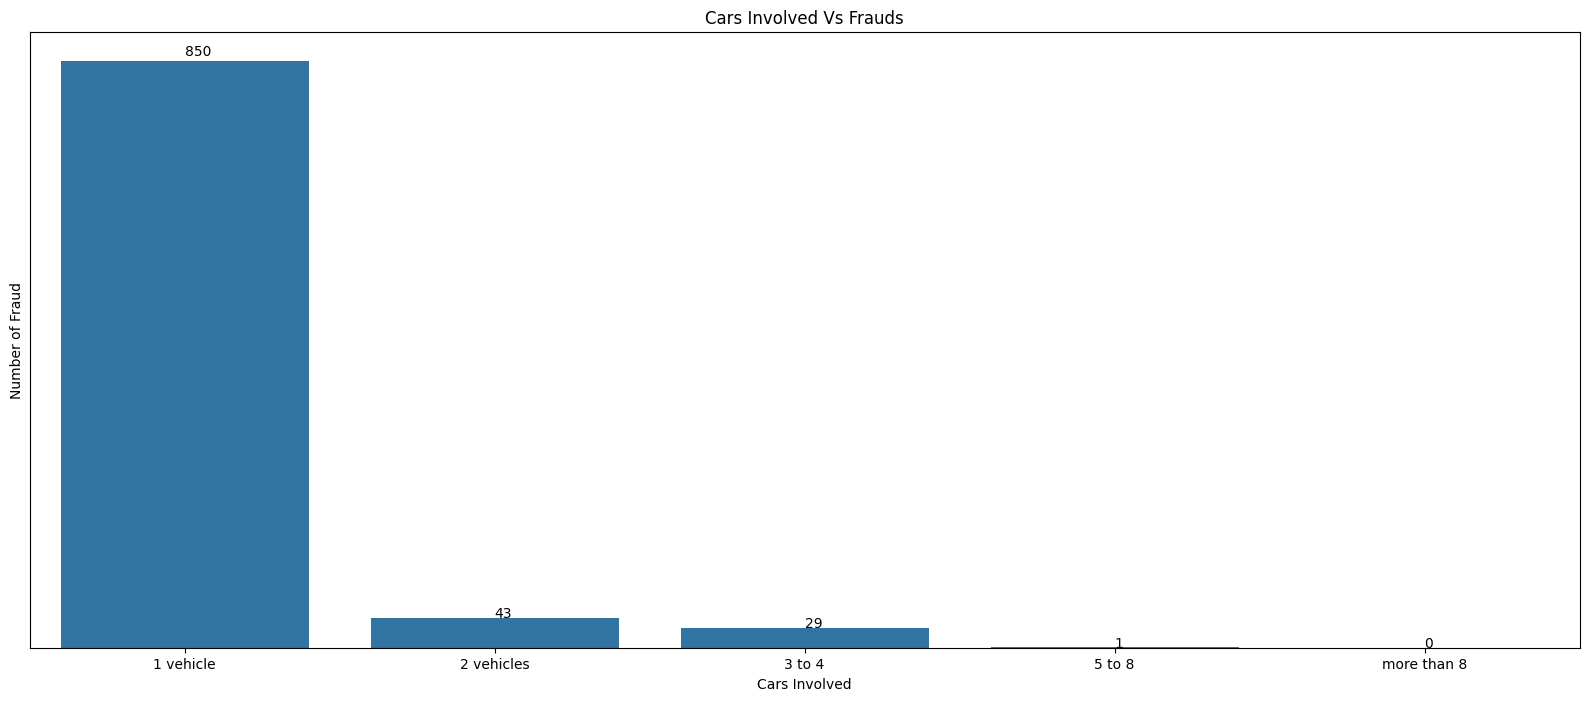

In [20]:

cars = df.groupby('NumberOfCars')['FraudFound'].sum()
plt.figure(figsize=(20,8))
plt.title("Cars Involved Vs Frauds")

ax = sns.barplot(x=cars.index,y=cars.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.4, p.get_height()*1.01))
plt.xlabel("Cars Involved")
plt.ylabel("Number of Fraud");
plt.yticks([])
plt.show()

### Чаще всего мошенничество происходит, когда в происшествии участвует только одно транспортное средство.

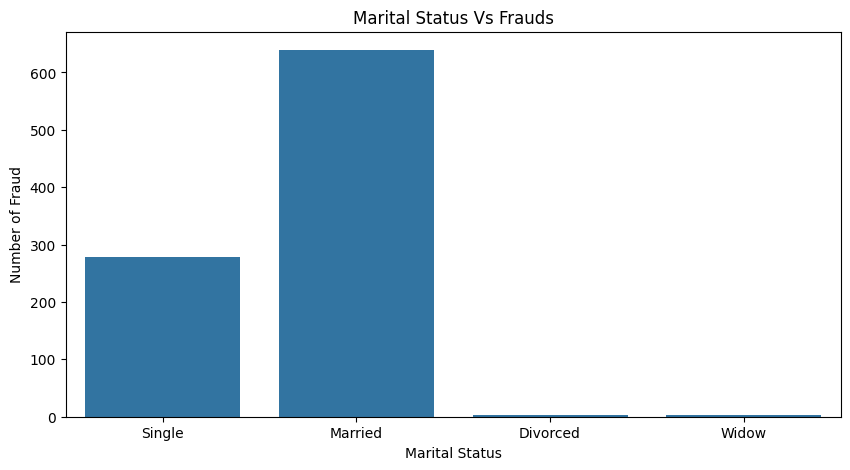

In [21]:
fraud = df[df['FraudFound'] == 1]
plt.figure(figsize=(10,5))
plt.title("Marital Status Vs Frauds")
sns.countplot(x=fraud['MaritalStatus']);
plt.xlabel("Marital Status")
plt.ylabel("Number of Fraud");

### Женатые люди чаще оказываются вовлечены в случаи мошенничества.

In [22]:
le = LabelEncoder()

cols = df.select_dtypes('O').columns

df[cols]= df[cols].apply(le.fit_transform)
df['Year'] = le.fit_transform(df.Year)

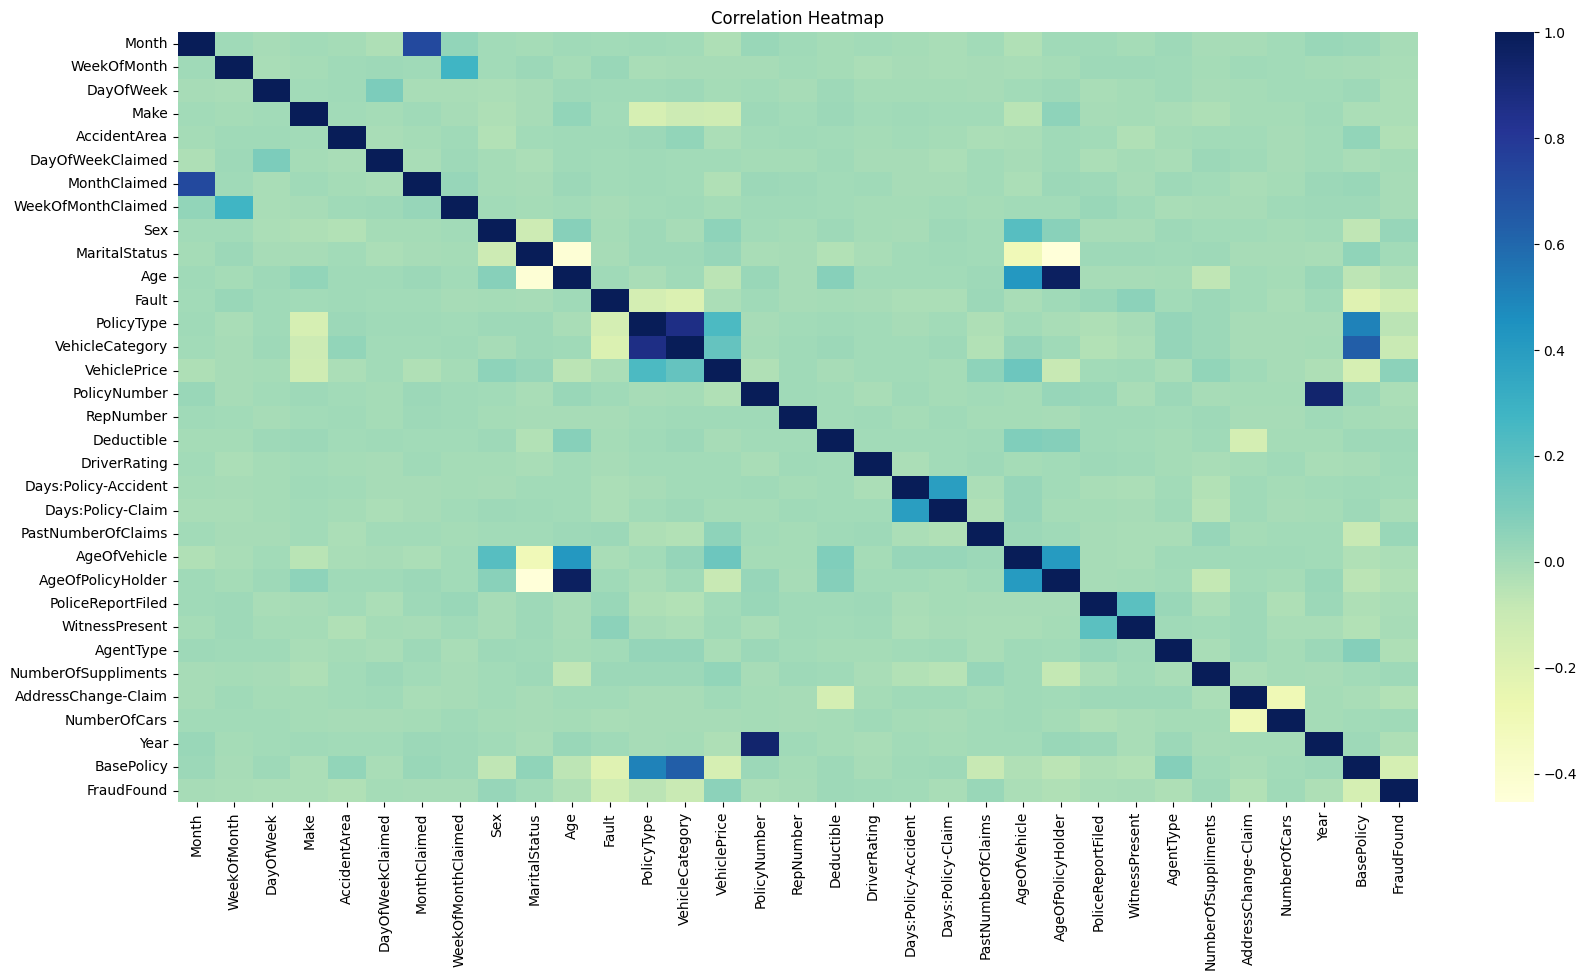

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

### Заметна сильная корреляция между некоторыми признаками, значит можно игнорировать одно из двух взаимнокоррелирующих полей

In [24]:
df_new = df[['Make', 'AccidentArea','Sex',\
       'MaritalStatus','Fault', 'VehicleCategory',\
       'VehiclePrice', 'Year',\
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',\
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',\
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',\
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars',\
       'BasePolicy', 'FraudFound']]

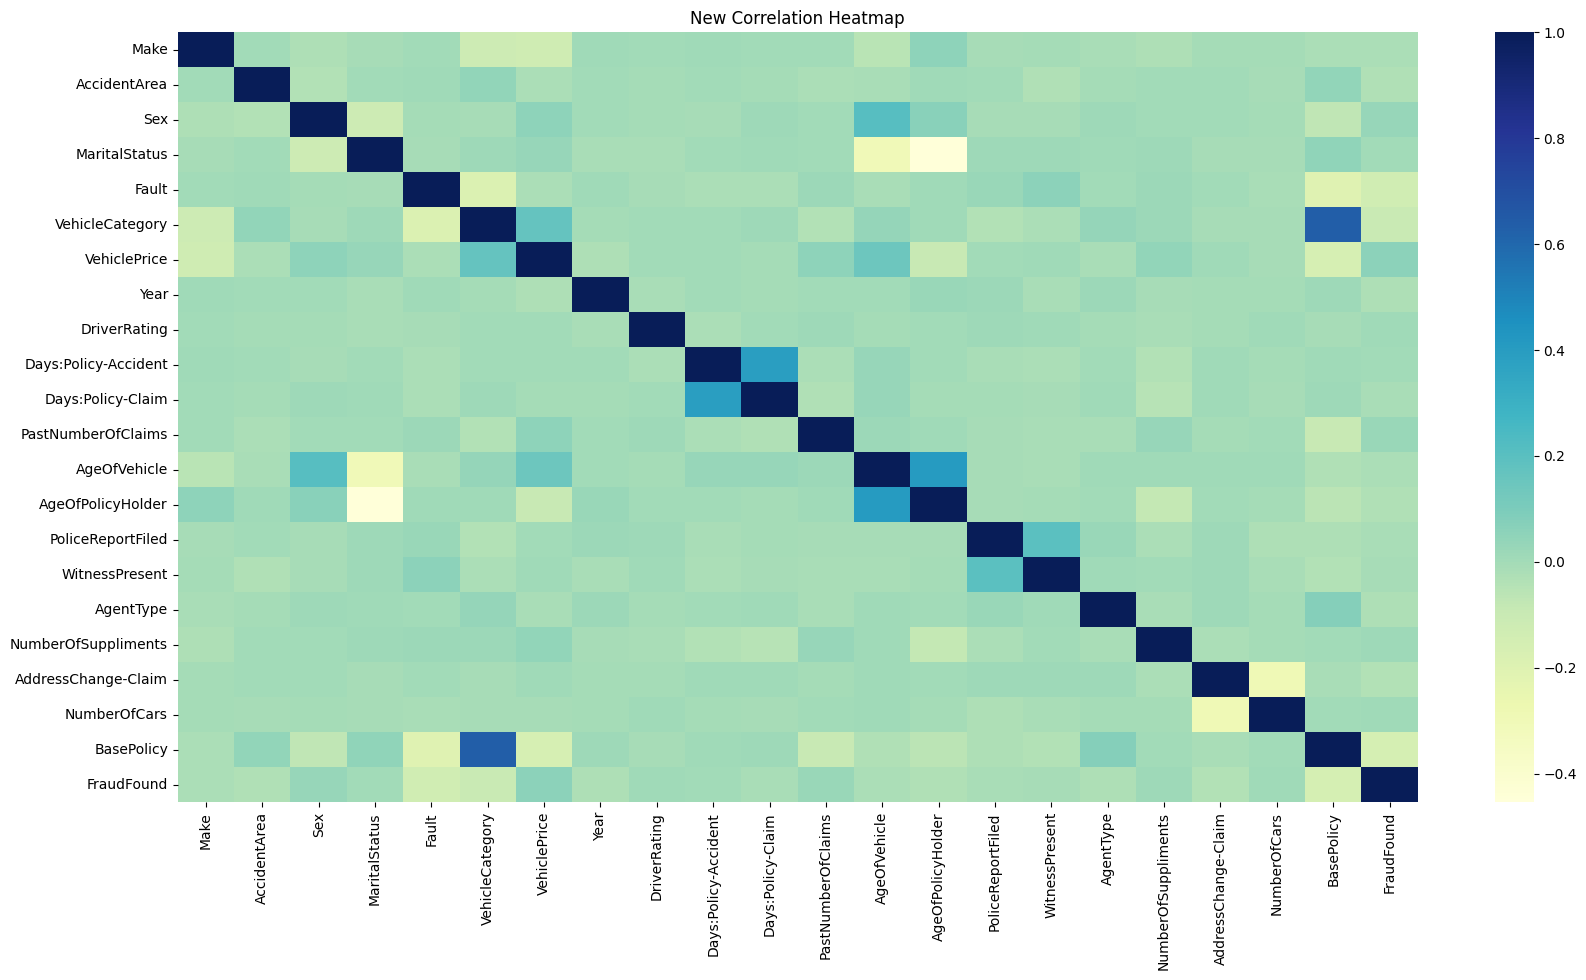

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(df_new.corr(),cmap="YlGnBu")
plt.title("New Correlation Heatmap")
plt.show()

### Также наблюдается некоторая корреляция между типом полиса (BasePolicy) и типом транспортного средства (VehicleCategory)

In [26]:
def conf_matrix(y_test,y_pred):
    con_matrix = confusion_matrix(y_test,y_pred)
    con_matrix = pd.DataFrame(con_matrix,range(2),range(2))
    
    plt.figure(figsize=(5,5))
    plt.title("Confusion Matrix")
    sns.heatmap(con_matrix,annot=True,cbar=False,fmt='g')

# Определение наборов данных для обучения и тестирования

In [27]:
X = df_new.drop('FraudFound',axis=1)
y = df_new[['FraudFound']]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11565, 21), (3855, 21), (11565, 1), (3855, 1))

# Логистическая регрессия

Accuracy of thie model:		 0.9398184176394293


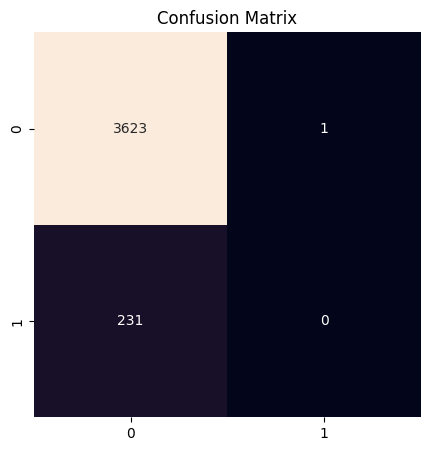

In [28]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

acc_lr=accuracy_score(y_test, lr_pred)
print("Точность классификации:\t\t",acc_lr)
conf_matrix(y_test,lr_pred)

# Случайный лес

Accuracy of thie model:		 0.9392996108949416


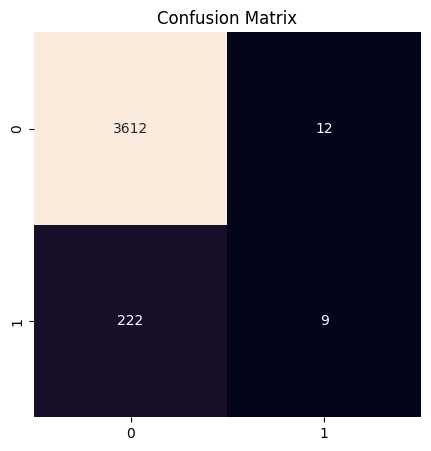

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

acc_rfc=accuracy_score(y_test, rfc_pred)
print("Точность классификации:\t\t",acc_rfc)
conf_matrix(y_test,rfc_pred)

#### Набор данных сильно несбалансирован и плохо подходит для качественного обучения. Этот недостаток можно исправить одним из двух способов:

* Увеличение количества примеров  мошенничества  
(FraudFound == 1)

* Уменьшение количества примеров отсутствия мошенничества  (FraudFound == 0)

#### 1. Увеличение количества примеров  мошенничества  (FraudFound == 1)

In [30]:
n = df_new.FraudFound.value_counts()[0]

df_majority = df_new[df_new.FraudFound==0]
df_minority = df_new[df_new.FraudFound==1]

df_minority_upsampled = resample(df_minority,replace=True,n_samples = n,random_state=42)

df_upsampled = pd.concat([df_majority,df_minority_upsampled])
df_upsampled.FraudFound.value_counts()

FraudFound
0    14497
1    14497
Name: count, dtype: int64

In [31]:
X = df_upsampled.drop('FraudFound',axis=1)
y = df_upsampled[['FraudFound']]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21745, 21), (7249, 21), (21745, 1), (7249, 1))

## Логистическая регрессия

Accuracy of thie model:		 0.7453441854048835


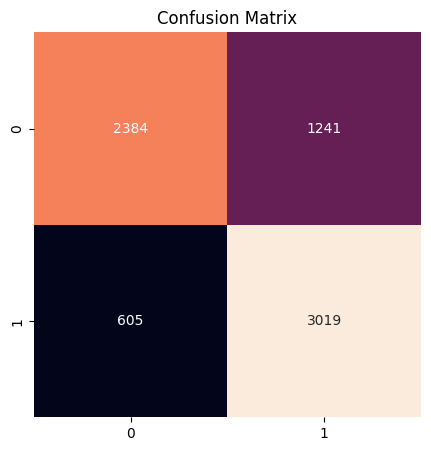

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_upscale_pred = lr.predict(X_test)

acc_lr_upscale=accuracy_score(y_test, lr_upscale_pred)
print("Точность классификации:\t\t",acc_lr_upscale)
conf_matrix(y_test,lr_upscale_pred)

# Случайный лес

Accuracy of thie model:		 0.9873085942888674


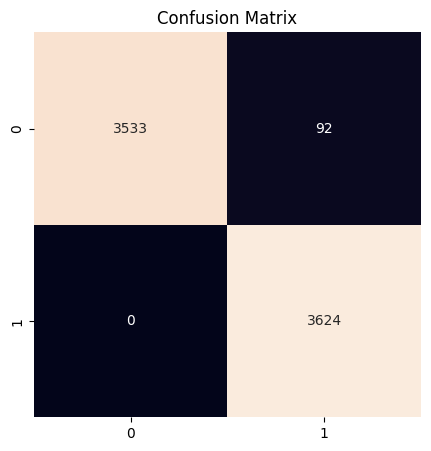

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_upscale_pred = rfc.predict(X_test)

acc_rfc_upscale=accuracy_score(y_test, rfc_upscale_pred)
print("Точность классификации:\t\t",acc_rfc_upscale)
conf_matrix(y_test,rfc_upscale_pred)

# Уменьшение количества примеров отсутствия мошенничества  
# (FraudFound == 0)

In [34]:
n = df_new.FraudFound.value_counts()[1]

df_majority = df_new[df_new.FraudFound==0]
df_minority = df_new[df_new.FraudFound==1]

df_majority_downsampled = resample(df_majority,replace=False,n_samples = n,random_state=42)

df_downsampled = pd.concat([df_minority,df_majority_downsampled])
df_downsampled.FraudFound.value_counts()

FraudFound
1    923
0    923
Name: count, dtype: int64

In [35]:
X = df_downsampled.drop('FraudFound',axis=1)
y = df_downsampled[['FraudFound']]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1384, 21), (462, 21), (1384, 1), (462, 1))

# Логистическая регрессия

Accuracy of thie model:		 0.70995670995671


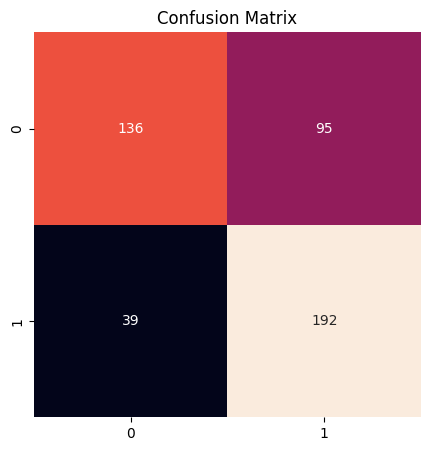

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_downscale_pred = lr.predict(X_test)

acc_lr_downscale=accuracy_score(y_test, lr_downscale_pred)
print("Точность классификации:\t\t",acc_lr_downscale)
conf_matrix(y_test,lr_downscale_pred)

# RandomForest Classifier

Accuracy of thie model:		 0.7489177489177489


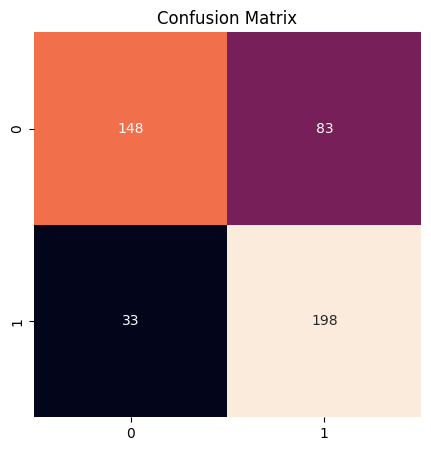

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_downscale_pred = rfc.predict(X_test)

acc_rfc_downscale=accuracy_score(y_test, rfc_downscale_pred)
print("Точность классификации:\t\t",acc_rfc_downscale)
conf_matrix(y_test,rfc_downscale_pred)

# Сравнение моделей по точности классификации

In [38]:
data = {'Model':['Logistic Regression','UpScale Logistic Regression','DownScale Logistic Regression',
                 'RandomForest Classifier','UpScale RandomForest Classifier','DownScale RandomForest Classifier'],
        
        'Accuracy Score':[acc_lr,acc_lr_upscale,acc_lr_downscale,acc_rfc,acc_rfc_upscale,acc_rfc_downscale]}

comparision_table=pd.DataFrame(data)                               
print(comparision_table)

                               Model  Accuracy Score
0                Logistic Regression        0.939818
1        UpScale Logistic Regression        0.745344
2      DownScale Logistic Regression        0.709957
3            RandomForest Classifier        0.939300
4    UpScale RandomForest Classifier        0.987309
5  DownScale RandomForest Classifier        0.748918
